## 1. 필요 Library 설치

In [1]:
!pip install beautifulsoup4

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [108]:
!pip install pillow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [110]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 2. 실행 코드

### (1) 라이브러리 불러오기

In [1]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import random
import requests
import re

import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

### (2) 네이버 종목 토론방 긁어오기

In [2]:
def stock_discussion_room(stock_code, pages):
    
    opinion_date_total = []
    opinion_total = []
    chanti = []
    anti = []
    
    r = re.compile(r'\d{4}.\d{2}.\d{2}')
    
    for i in range(pages) :
        
        url = 'https://finance.naver.com/item/board.nhn?code=' + stock_code + '&page=' + str(i+1)
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        opinion = soup.select('.title')
        opinion_date = []
        
        for date in soup.find_all('span') : 
            match = r.search(date.text)
            
            if match != None :
                opinion_date.append(match.group())

        opinion_date = opinion_date[-20:]
        
        for value in opinion_date : 
            opinion_date_total.append(value)
        
        for i in range(20) :    
            opinion_total.append(opinion[i].find('a')['title'])
           
        for i, finger in enumerate(soup.find_all('strong')) :
            
            if i in np.arange(2,42, step = 2) :     
                chanti.append(finger.text)

            elif i in np.arange(3,42, step = 2) :
                anti.append(finger.text)
    
    return opinion_date_total, opinion_total, chanti, anti

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [3]:
opinion_date_total, opinion_total, chanti, anti = stock_discussion_room('082270', 500)

In [4]:
df = pd.DataFrame({'날짜' : opinion_date_total, '토론제목' : opinion_total, '찬성' : chanti, '반대' : anti})

In [5]:
df['날짜'].unique()

array(['2019.12.31', '2019.12.30', '2019.12.29', '2019.12.28',
       '2019.12.27', '2019.12.26', '2019.12.25', '2019.12.24',
       '2019.12.23', '2019.12.22', '2019.12.21', '2019.12.20',
       '2019.12.19', '2019.12.18', '2019.12.17', '2019.12.16',
       '2019.12.15', '2019.12.14', '2019.12.13', '2019.12.12',
       '2019.12.11', '2019.12.10', '2019.12.09'], dtype=object)

In [6]:
df.head()

,날짜,토론제목,찬성,반대
0,2019.12.31,싱가폴 학회까지는 봐야겠지,3,0
1,2019.12.31,● 20년 1월 공매도 ㅈ되는 달이다,13,3
2,2019.12.31,2020 싱가폴 알츠하이머 학회 일정,16,2
3,2019.12.31,[모멘텀투자하지말자! 코스닥공매도학정치하에선],1,2
4,2019.12.31,지금 시장 소문,4,2


### (3) 인간지표 구하기

In [7]:
df['인간지표'] = np.nan
for i in range(df.shape[0]) :
    if int(df['찬성'][i]) == int(df['반대'][i]) :
        df['인간지표'][i] = '중립'
    elif int(df['찬성'][i]) > int(df['반대'][i]) :
        df['인간지표'][i] = '찬티'
    elif int(df['찬성'][i]) < int(df['반대'][i]) :
        df['인간지표'][i] = '안티'
df

C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\woong\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,날짜,토론제목,찬성,반대,인간지표
0,2019.12.31,싱가폴 학회까지는 봐야겠지,3,0,찬티
1,2019.12.31,● 20년 1월 공매도 ㅈ되는 달이다,13,3,찬티
2,2019.12.31,2020 싱가폴 알츠하이머 학회 일정,16,2,찬티
3,2019.12.31,[모멘텀투자하지말자! 코스닥공매도학정치하에선],1,2,안티
4,2019.12.31,지금 시장 소문,4,2,찬티
5,2019.12.31,미수가능종목으로 바뀌었네,1,5,안티
6,2019.12.31,강성 주주님들,21,0,찬티
7,2019.12.31,난 고작 100주밖에 없지만,21,0,찬티
8,2019.12.31,고점에서 외바닥 상승은 기술적 반등일 뿐이다.,5,16,안티
9,2019.12.31,저번 쉬는날엔 정성이 부족했어,0,1,안티


### (4) 워드클라우드 살펴보기

In [8]:
contents = " "
for content in df['토론제목'] : 
    contents = contents + " " + content
contents


'  싱가폴 학회까지는 봐야겠지 ● 20년 1월 공매도 ㅈ되는 달이다 2020 싱가폴 알츠하이머 학회 일정 [모멘텀투자하지말자! 코스닥공매도학정치하에선] 지금 시장 소문 미수가능종목으로 바뀌었네 강성 주주님들 난 고작 100주밖에 없지만 고점에서 외바닥 상승은 기술적 반등일 뿐이다. 저번 쉬는날엔 정성이 부족했어 새해 복 많이 받으세요 1월에 10만 간다는 주식이 이 주식인가요? ㅉㅉ 반등을 매집이라니. ● 인생 역전의 기회다 라임자산이  쥐고있다 목요일 예상 차트쟁이들은 절대 못사는 차트고~~ 미국 임상은 언제 하나.. 젬백스의 성공을 바라는 마음 [삭제된 게시물의 답글]아마 내년 6월까지는 조정 한번 할 것 같다. 삼박자를  모두갖춘 젬백스 어디까지오를지 궁금하다 시외단일가 ● 오늘 휴장??? 일본인들은 30년 전부터~ 모든 수익성자산에 투자하지 않는다. 집도 잘 사지 않는다. 그 이유 젬백스 개인  순매도  1 위 바이오는 이제부터 치메주만 간다 젬백스주주모임톡 2020년2월중순까지... 내일 형은 항상 합당한 이유를 제시했다. 유튜브 리픽싱 제도 금지하라!! 오늘은 무슨 기회? ☆ 재료는 역대급인데 게시판은 조용 7월 뉴스 배임 횡령은 2019년도주주님들고생하셨습니다 뻥치지마~~알바야..젬백스주주모임 초보들이 넘 많아요. 부하뇌동 하지마셔요. GLP-1(2) 젬백스 급등 이유 젬백스 급등 이유 ● 이평선 모두 45도 우상향 GLP-1(1) 개인도 빠지고 새해에 곧.. 2020년 첫거래일 아무리봐도 홀딩하면서 갈껀 2일 개장날 4만원 돌파는확실하네요 내가 20만 간다고 혔다 여기에 글 올리는 장사치들 대박 선배님들 궁금한게있습니다 ??빵빵 올해는 신라젠도 15만 갔는디 오 젬백스 현상황 5,3글자 요약 연말이고해서 수익실현했습니다 인산화는 ? 가두기 전략 ! 젬백스  주가 방향 일단 5만은 쉽게갑니다~~~ 새해 첫거래일 시원하게~~ 목요일에는 드디어 4만원대진입 저 여기서 내려요 테스트 마무리 시간외에서.....  시간외  그가격도 당분간 보기어럽지~ 시

In [9]:
stock_img = Image.open('C:/Users/woong/Desktop/Youtube Contents/[Episode2] 네이버 종목토론방 찬티 vs 안티 인간지표별 주가 변동/젬백스.png')
mask = Image.new("RGB", stock_img.size, (255,255,255))
mask.paste(stock_img)
mask = np.array(mask)

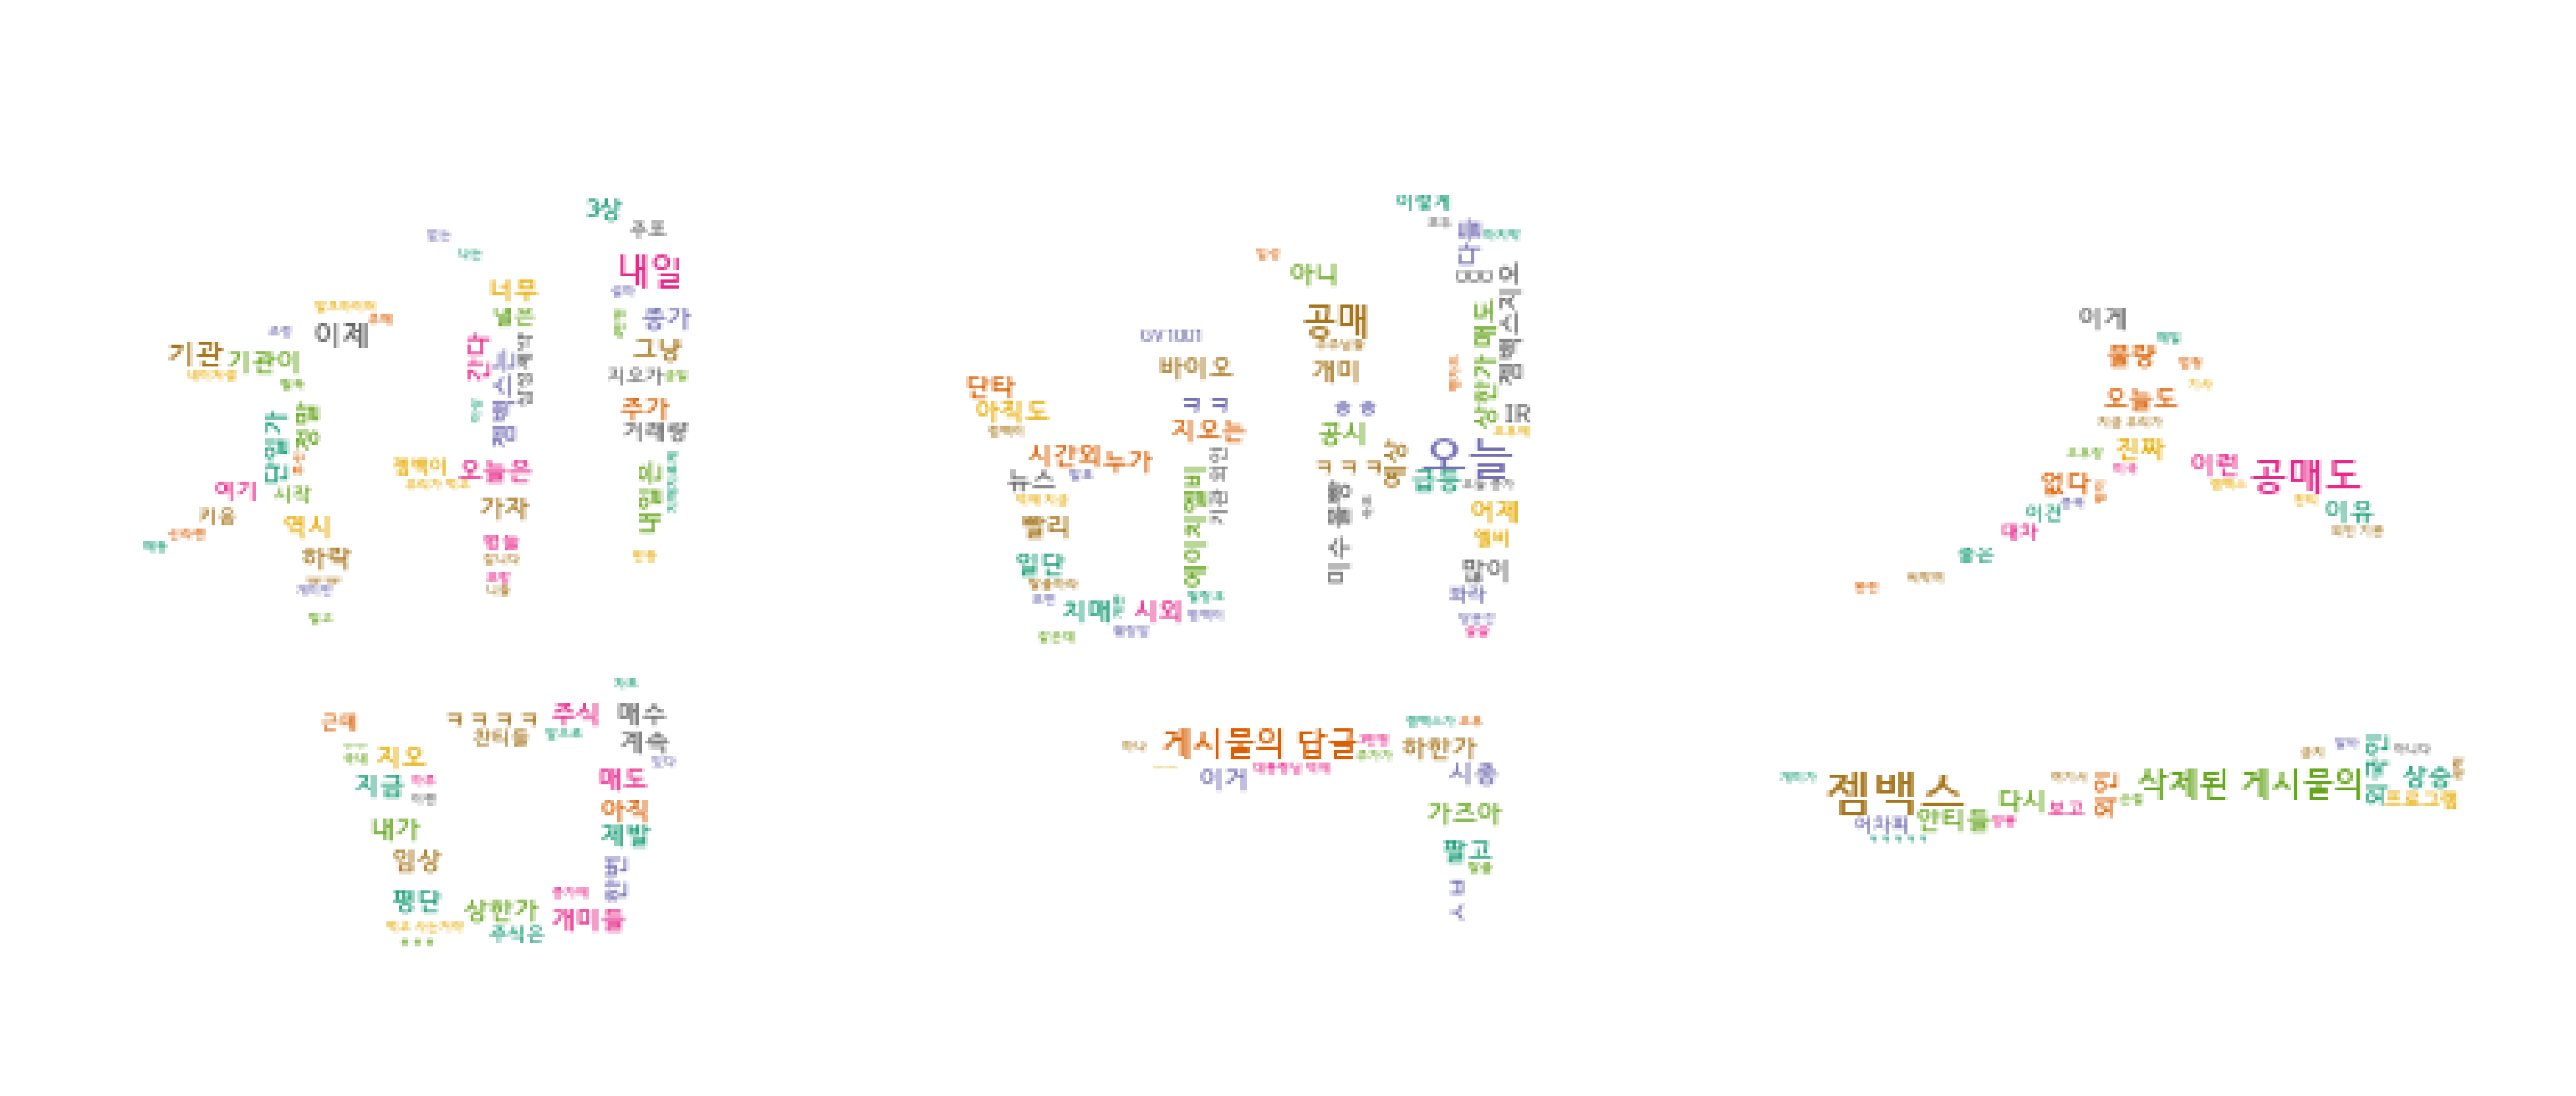

In [10]:
plt.figure(figsize = (80,30))
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HANDotumB.ttf', background_color="white", colormap = "Dark2_r",
               max_words=2000, mask=mask, max_font_size=300, random_state=42)
               
wc.generate_from_text(contents)

plt.imshow(wc)
plt.axis("off")
plt.savefig('WC_젬백스.png')

### (5) 인간지표 별 주가 그래프 그리기

In [11]:
df_test = df[['날짜', '인간지표']]
df_dummies = pd.get_dummies(df_test['인간지표'])
df_hodu = pd.concat([df_test['날짜'], df_dummies], axis = 1)
df_hodu = df_hodu.groupby('날짜').sum()

In [12]:
df_hodu.head()

,안티,중립,찬티
날짜,,,
2019.12.09,413.0,636.0,1152.0
2019.12.10,279.0,632.0,872.0
2019.12.11,266.0,309.0,562.0
2019.12.12,138.0,192.0,418.0
2019.12.13,146.0,109.0,385.0


In [13]:
def daily_stock_close(stock_code):
    
    daily_close = []
    date = []
    
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + stock_code
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    for i in range(3,len(soup.select('table.type2')[1].select('tr'))) :
        
        try :
            daily_close.append(soup.select('table.type2')[1].select('tr')[i].select('td')[1].text.replace(',' , ''))
            date.append(soup.select('table.type2')[1].select('tr')[i].select('td')[0].text)
            
        except IndexError :
            continue
        
    return date, daily_close

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [14]:
date, daily_close = daily_stock_close("082270")

In [15]:
df_close = pd.DataFrame({"날짜" : date, "종가" : daily_close})

In [16]:
df_close.head()

,날짜,종가
0,2019.12.30,38550
1,2019.12.27,36050
2,2019.12.26,35400
3,2019.12.24,32450
4,2019.12.23,32300


In [17]:
df = pd.merge(df_close, df_hodu, how = 'right', on = '날짜')

In [18]:
df.sort_values(['날짜'], ascending=True, inplace=True)

In [19]:
df.dropna(axis=0, inplace=True)
df.head()

,날짜,종가,안티,중립,찬티
14,2019.12.09,38350,413.0,636.0,1152.0
13,2019.12.10,33200,279.0,632.0,872.0
12,2019.12.11,33350,266.0,309.0,562.0
11,2019.12.12,33000,138.0,192.0,418.0
10,2019.12.13,32550,146.0,109.0,385.0


In [23]:
df['종가'] = df['종가'].astype(int)

In [20]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] 

사용가능한 TTF 폰트 개수: 745


['C:\\Windows\\Fonts\\BOD_B.TTF',
 'C:\\Windows\\Fonts\\BOD_CI.TTF',
 'C:\\WINDOWS\\Fonts\\malgunsl.ttf',
 'C:\\WINDOWS\\Fonts\\ROCKI.TTF',
 'C:\\Windows\\Fonts\\MB.TTF',
 'C:\\WINDOWS\\Fonts\\MB.TTF',
 'C:\\Windows\\Fonts\\ANTQUABI.TTF',
 'C:\\WINDOWS\\Fonts\\FRAMDCN.TTF',
 'C:\\WINDOWS\\Fonts\\BOOKOSI.TTF',
 'C:\\Windows\\Fonts\\UnBatang.ttf']

In [21]:
font_fname = 'C:\\Windows\\Fonts\\HANDotumB.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

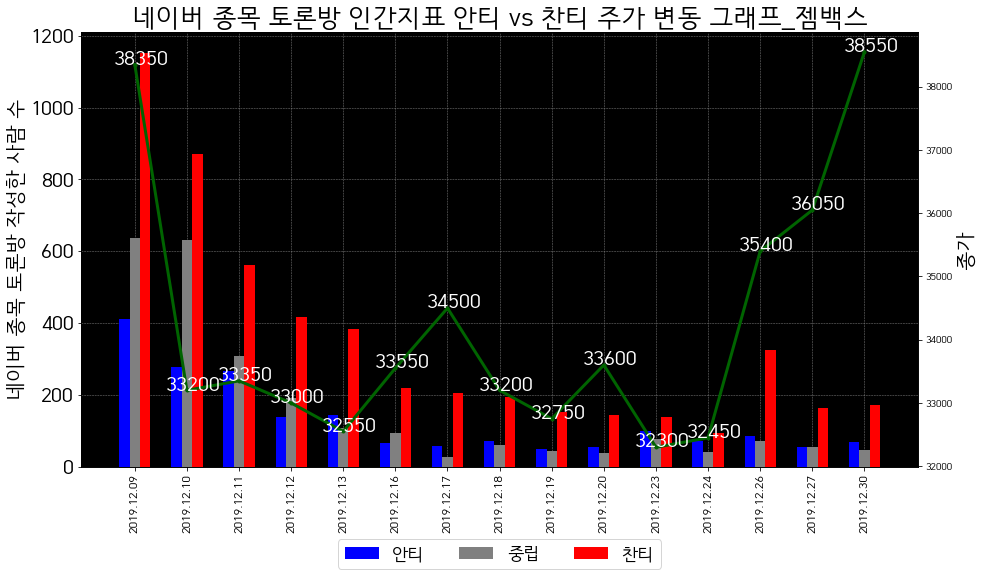

In [24]:
x = np.arange(len(df['날짜']))

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x+-0.2, df['안티'],width=0.2, label = '안티', color = 'blue')
plt.bar(x, df['중립'],width=0.2,  label = '중립', color = 'gray')
plt.bar(x+0.2, df['찬티'],width=0.2, label = '찬티', color = 'red')
plt.xticks(x, df['날짜'], fontsize='12', rotation = 90)
plt.title('네이버 종목 토론방 인간지표 안티 vs 찬티 주가 변동 그래프_젬백스', fontsize='25')
plt.yticks(fontsize=20)
ax.set_ylabel('네이버 종목 토론방 작성한 사람 수', fontsize = '20')
ax.patch.set_facecolor('black')
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.legend(bbox_to_anchor=(0.5, -0.2), loc = 'center', ncol = 3, fontsize=17)


ax2 = ax.twinx()
ax2.set_ylabel('종가', fontsize = 20)
ax2.plot(df['종가'].values, linestyle='-', marker='.', linewidth=3.0, color = 'darkgreen')

for i, x in enumerate(x):
    plt.text(x-0.4, df['종가'].values[i], df['종가'].values[i], fontsize=20, color ='white')

plt.savefig('인간지표 주가 변동 그래프_젬백스.png')
plt.show()